## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### DBSCAN - Demo 2

* Utilização do algoritmo DBSCAN com diferentes parâmetros.
* Base de dados sintéticas com diferentes formatos

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_s_curve

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Testar DBSCAN

In [2]:
def train_and_plot(data, eps=0.5, min_samples=5):
    
    # Copiamos os dados e removemos a coluna label 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.labels_
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

### Criar base de dados sintética de diferentes formatos

In [3]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,-0.319506,-0.962027,0
1,-0.633317,0.950726,0
2,0.403155,0.147572,1
3,-0.135031,-0.205354,1
4,-0.547161,0.741499,0


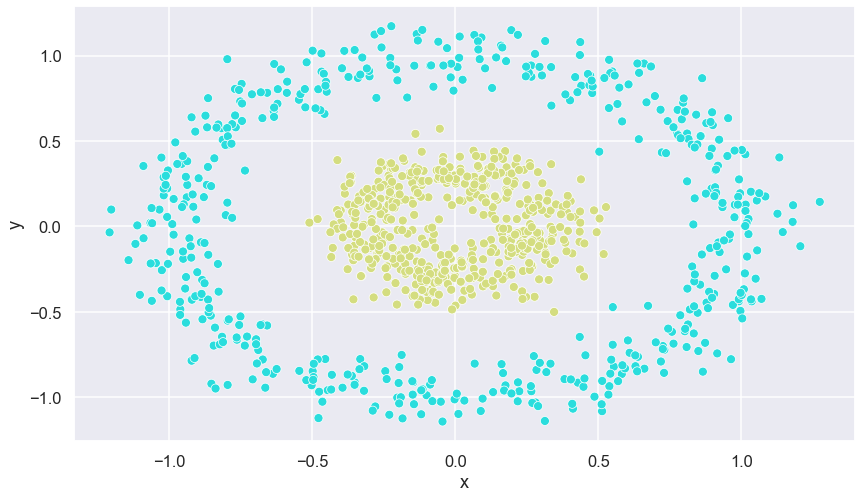

In [4]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

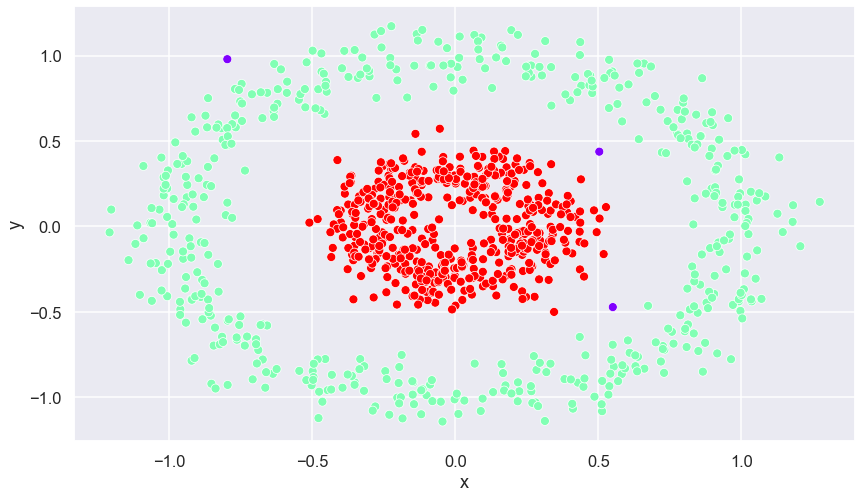

In [5]:
eps = 0.15
min_samples = 5

train_and_plot(df, eps, min_samples)

### Criar base de dados sintética de diferentes formatos

In [6]:
transformation = [[1.3, 2.3], [1.2, 5.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,8.523998,11.312797,4
1,-0.577043,-11.295426,5
2,-18.258572,-49.227766,0
3,-17.940188,-51.937606,0
4,7.089114,38.861673,6


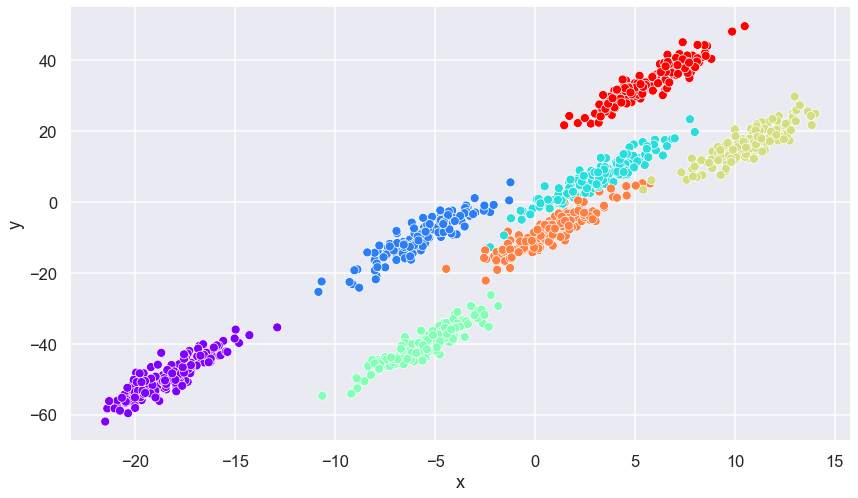

In [7]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

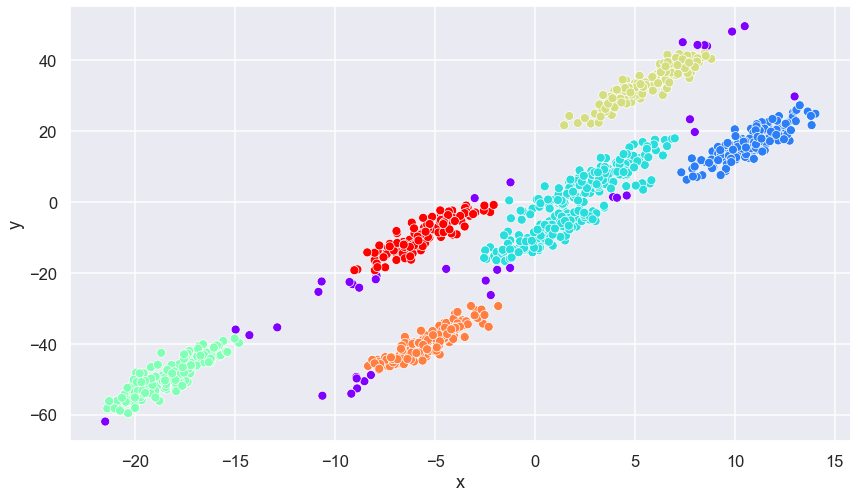

In [8]:
train_and_plot(df_transformed, eps=1.5, min_samples=5)